## Sign Language Gesture Prediction

## Table of contents

1. Introduction

2. About the dataset

3. Importing libraries

4. Exploratory data analysis

5. Data preprocessing 

6. Model building 

7. Model evaluation

8. Conclusion

Mounting with google drive to access the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introduction

Sign language is used to communicate with people who have problem hearing. The outcome of the project could be used by people to learn sign languages, it could also be used in institutions for teaching. 

## About the dataset:


The dataset contains sign language gesture images of English Alphabets from A-Z, Numbers from 0 - 9 and a Space character - , which in total has 37 different hand gestures. Images are coloured, with an image size of 50 * 50. Images are stored in seperate folder with respective folder names such as A to Z folder has gesture images of alpahbet A to Z , 0-9 folder has images of numbers from 0 to 9 and space(-) folder has images of space that people use to express in sign language and each folder has 1500 images (each gestures has 1500 samples). 

Dataset is avaiable at "https://drive.google.com/drive/folders/1HG8cBKTNFL_13upsnqXehH6zJClG6Qh0?usp=sharing"

## Importing necessary libraries

1. Using pandas library to load dataset and data processing

2. Numpy to work with arrays and matrices

3. Matplotlib for data visualization

4. Using splitfolders , splitting the data into train, test and validation dataset

5. Using tensorflow and keras libraries for model building and training.


In [ ]:
! pip install split-folders --quiet

In [ ]:
import pandas as pd
import numpy as np
#import splitfolders
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


* Before exploring the dataset splitting the data into training , testing and validation dataset. Since I am using tensorflows "image_dataset_from_directory" to load the images, they donot have an option to split the dataset into three directories, they provide only train and validation split. However, I would like to have train, test and validation split. And using splitfolder function to do the same.

* The splifolders function splits the data with respect to the ratios. Therefore it takes the input dataset directory , the destination directory to save the splitted datasets and the ratio of the split as parameters. 

* Here, by passing the dataset directory into splitfolder function, splitting the data into train, test and validation dataset providing the ratio as 80% , 10% and 10% respectively and storing it in a new folder (dataset- foldername). 



In [ ]:
splitfolders.ratio("/content/drive/MyDrive/sign_lan", output="/content/drive/MyDrive/sign_lan/dataset",
     ratio=(.8, .1, .1)) 

Copying files: 0 files [00:00, ? files/s]

Since I have already split the data using tha above code and stored in seperate folder I did not run this code again

## Exploratory data analysis 

Since its an image data using tensorflows " image_dataset_from_directory " to load the datasets.

Loading the train data passing parameters such as

1. directory, which gives the path of the train data 

2. labels is set to 'inferred' ( since i would like to have the same label names from the directory)

3. with lables_mode as int, encoding the labels as integers

4. using a default batch size ( 32 ) to train the data 

5. providing default image size (256,256)

6. also providing image channel (color_node) as 3 ie., rgb

7. since we have seperate datasets for validation, here the validation_split is set to None


* image_size and batch_size values could be assigned to a variable since we make use of it again.

In [ ]:
image_size = (256, 256)
batch_size = 32

In [ ]:
df_train = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/sign_lan/dataset/train',
    labels='inferred',
    label_mode ='int',
    class_names=None,
    color_mode ='rgb',
    batch_size = batch_size,
    image_size = image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,    
)

Found 14819 files belonging to 37 classes.


* It is observed, that 14819 files are loaded and saved in df_train which belongs to 37 classes of ( A-z, 0-9, - )

* Using dir function to check the builtin properties and methods of df_train




In [ ]:
dir(df_train)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_get_legacy_saved_model_children',
 '_graph',
 '_graph

* Since I have assigned the labels to inferred, we can get the list of class names using the method "class_names" and the names would match the subdirectory names of the data




In [ ]:
classes = df_train.class_names
classes

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '_']

In [ ]:
len(classes)

37

In [ ]:
len(df_train)

464

* Here the length of the train dataset (df_train) is 462 ,as we use batch of datas. We could check this by multiplying the length of the dataset with batch size which gives the total file length

In [ ]:
464*32

14848

* As the images are loaded as batches, iterating over the first batch of images using take(1) method and retrieving the image and the label batches as tensorflow object. The image batch will 32 images of shape (256 * 256 * 3) and the label batch  will have corresponding labels of 32 images

* Using numpy() function to convert tensorflow object to numpy array

In [ ]:
for image, label in df_train.take(1):
  print(image.numpy())
  print(label.numpy())

[[[[132.  91.  73.]
   [132.  91.  73.]
   [132.  91.  73.]
   ...
   [143. 132. 104.]
   [143. 132. 104.]
   [143. 132. 104.]]

  [[132.  91.  73.]
   [132.  91.  73.]
   [132.  91.  73.]
   ...
   [143. 132. 104.]
   [143. 132. 104.]
   [143. 132. 104.]]

  [[132.  91.  73.]
   [132.  91.  73.]
   [132.  91.  73.]
   ...
   [143. 132. 104.]
   [143. 132. 104.]
   [143. 132. 104.]]

  ...

  [[111.  86.  64.]
   [111.  86.  64.]
   [111.  86.  64.]
   ...
   [101.  93.  74.]
   [101.  93.  74.]
   [101.  93.  74.]]

  [[111.  86.  64.]
   [111.  86.  64.]
   [111.  86.  64.]
   ...
   [101.  93.  74.]
   [101.  93.  74.]
   [101.  93.  74.]]

  [[111.  86.  64.]
   [111.  86.  64.]
   [111.  86.  64.]
   ...
   [101.  93.  74.]
   [101.  93.  74.]
   [101.  93.  74.]]]


 [[[175. 173. 174.]
   [175. 173. 174.]
   [175. 173. 174.]
   ...
   [187. 183. 180.]
   [187. 183. 180.]
   [187. 183. 180.]]

  [[175. 173. 174.]
   [175. 173. 174.]
   [175. 173. 174.]
   ...
   [187. 183. 180.]
 

* Visualizing 20 images from the first batch of images using matplotlib with image labels

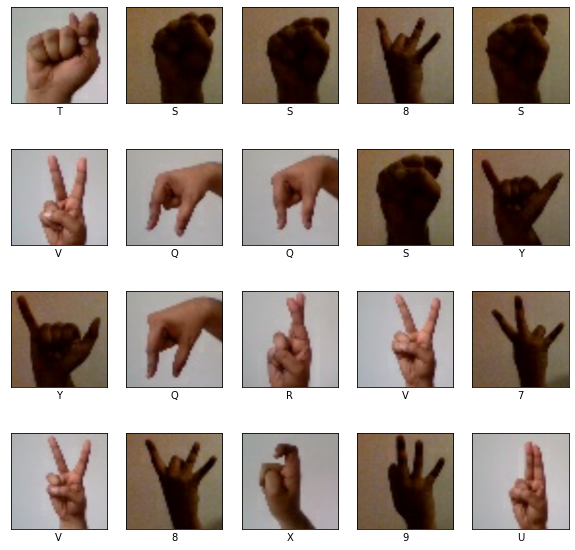

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i].numpy().astype('int'), cmap=plt.cm.binary)
    plt.xlabel(classes[label[i]])
  plt.show()

* Loading validation and test dataset from the directory again through "image_dataset_from_directory" providing the default batch size and image size

In [ ]:
df_vali = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/sign_lan/dataset/val',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,
)

Found 1852 files belonging to 37 classes.


In [ ]:
df_test = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/sign_lan/dataset/test',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,)

Found 1853 files belonging to 37 classes.


## Data preprocessing

Using tensorflows preprocessing layers 

1. Resizing layers- used to change image length and widhth to (256,256)

2. Rescaling layers- to stanadradize the data 

3. RandomZoom layers - to randomly zoom in or out on each axis of an image independently

In [ ]:
data_preprocessing = tf.keras.Sequential([
                                          
                                layers.experimental.preprocessing.Resizing(256,256),
                                layers.experimental.preprocessing.Rescaling(1./255, input_shape= (256,256,3)),
                                layers.experimental.preprocessing.RandomZoom(0.2)
                        
                    ])

* Before using data augumentation on the dataset, I have tried to visualisize how it looks with this particular dataset

- Using RandomFlip and RandomRotation layers





In [ ]:
data_augumentation = tf.keras.Sequential([
                                layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                layers.experimental.preprocessing.RandomRotation(0.2),
                                
                    ])



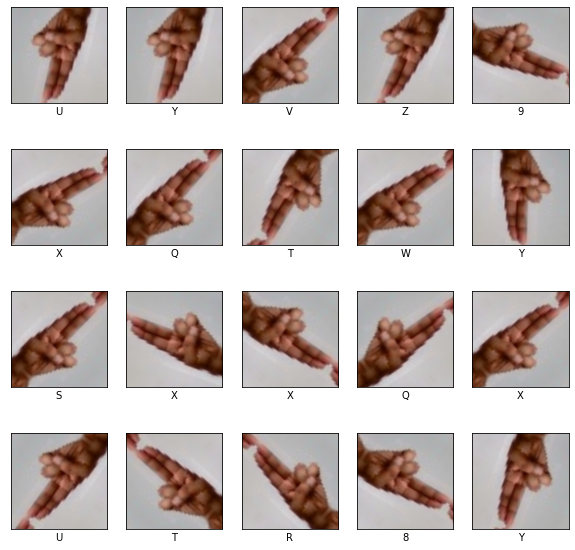

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    augmented_images = data_augumentation(image)
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[0].numpy().astype('int'), cmap=plt.cm.binary)
    plt.xlabel(classes[label[i]])
  plt.show()

* From the visualization it is clear that having a flipped or rotated images changes the meaning of the data. 
For example : The letter "i" when flipped a little towards right looks like "j" in gesture sign language

* However, I have also applied data augumentation in the model and realised the accuracy decreased with data agumentation. Hence using data agumentation is not an good option in this case

* So, I have only used data_preprocessing to build the model

## Model building

Within the sequential layers having 

1. data_preprocessing as the first layer consisting of resizing, rescaling and randomzoom preprocessing layers

2. Secondly having stack of convolutional 2D and Maxpooling layers. In this case, using 4 layers of each ( tried different counts), the convolutional layers take filters to find the features of the images and its size which is given by the kernel_size and an activation function

* The first convolutional layer takes the input shape (256,256,3) which is image height, width and the rgb mode , 32 filters with size of 3* 3 and relu as its activation function. And the following convolutional layers take same kernel size and activation function but the filter value as 64

* Using maxpooling layers as it extracts the main and sharp features from the images providing size of 3 * 3

3. Within the dense network 

* Having a flatten layer, which helps to reduce the dimensionality of the input to single dimension

* Followed by flatten layer having two deep layers where the first layer has 64 neurons and relu as its activation function, and the second is the output layer with 37 output categories and softmax as its activation function since it normalises the output




* As CNN layers are used, there is not much necessary to use more dense layers CNN layers itself does the job

* Have also tried different optimizer values

* Using SparseCategoricalCrossentropy as loss function, since the traget value is not onehotencoded, also setting the from_logits = False as use softmax functione loss is normalised

* Using accuracy as the metric to evaluate the model

* Have built the model within a function to try different optimizers

In [ ]:
def check_opt(optimizers):

  model = models.Sequential([
    data_preprocessing,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dense(37, activation = 'softmax'),
    
    ])

  
  model.compile(optimizer= optimizers,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])
  
  return model


* Trying out the following five optimizers and storing it in an  empty lists

* Looping through all the optimizers and applying to the function

* Using model.fit to train the training dataset and storing it in a variable. The fit model returns an history callback object which could be called to return the loss and accuracy values

* Appending the final epoch results to the list. Here since I use only 5 epochs appending the fifth loss and accuracy value with index value 4

In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

In [ ]:
train_acc = []
val_acc = []
train_loss =[]
val_loss = []

In [ ]:
for i in optimizers:
  model = check_opt(i)
  print('With optimizer:'+ i)
  
  
  history = model.fit(df_train, epochs= 5, batch_size = 32,validation_data= df_vali)

  train_acc.append(history.history['accuracy'][4])
  val_acc.append( history.history['val_accuracy'][4])

  train_loss.append(history.history['loss'][4])
  val_loss.append(history.history['val_loss'][4])



With optimizer:Adadelta
Epoch 1/5
464/464 [==============================] - 2443s 5s/step - loss: 3.5859 - accuracy: 0.0578 - val_loss: 3.5300 - val_accuracy: 0.0815
Epoch 2/5
464/464 [==============================] - 855s 2s/step - loss: 3.4578 - accuracy: 0.1615 - val_loss: 3.3583 - val_accuracy: 0.1587
Epoch 3/5
464/464 [==============================] - 853s 2s/step - loss: 3.2235 - accuracy: 0.0968 - val_loss: 3.0691 - val_accuracy: 0.0810
Epoch 4/5
464/464 [==============================] - 852s 2s/step - loss: 2.9328 - accuracy: 0.0810 - val_loss: 2.7971 - val_accuracy: 0.0810
Epoch 5/5
464/464 [==============================] - 850s 2s/step - loss: 2.6909 - accuracy: 0.1120 - val_loss: 2.5756 - val_accuracy: 0.1560
With optimizer:Adagrad
Epoch 1/5
464/464 [==============================] - 849s 2s/step - loss: 2.2792 - accuracy: 0.3317 - val_loss: 1.0160 - val_accuracy: 0.6431
Epoch 2/5
464/464 [==============================] - 845s 2s/step - loss: 0.6370 - accuracy: 0.8020 

* Created a dataframe out of these results to compare the accuracy and loss values

In [ ]:
data = {'Optimizers': ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'], 'Training_accuracy': [train_acc[0],train_acc [1],train_acc [2],train_acc [3],train_acc [4]],
         'Training_loss': [train_loss[0],train_loss[1],train_loss[2],train_loss[3],train_loss[4]],
         'Validation_accuracy' : [val_acc[0],val_acc[1],val_acc[2],val_acc[3],val_acc[4]],
         
         'Validation_loss': [val_loss[0],val_loss[1],val_loss[2],val_loss[3],val_loss[4]],
                                                                                              }

df = pd.DataFrame(data)  

In [ ]:
df

,Optimizers,Training_accuracy,Training_loss,Validation_accuracy,Validation_loss
0,Adadelta,0.111951,2.690866,0.156048,2.575551e+00
1,Adagrad,0.978069,0.107856,0.993520,5.318208e-02
2,Adam,1.000000,0.000080,1.000000,2.354132e-05
3,RMSprop,0.999393,0.002359,1.000000,1.400600e-07
4,SGD,0.996558,0.025326,1.000000,2.803849e-03


It is observed that adam optimizer performs better

I have tried to train the model with 10 epochs, but the accuracies were consitent even from the third epoch and did not have any change till 10th. So i decided to run only for 5 epochs.

* Since adam gives better accuracy training the model and checking for accuracy with the same

In [ ]:
model = models.Sequential([
    data_preprocessing,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=( 256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dense(37, activation = 'softmax'),
    
])
model.build(input_shape = (32,256,256,3))

model.summary() shows all the layers (networks) used in the model




In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 84, 84, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 82, 82, 64)          18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 27, 27, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (32, 25, 25, 64)         

In [ ]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

Using train dataset to fit the model providing the validatioin dataset to validate with 5 epochs.


I am storing the results within the history variable which could be used to visualise the results

In [ ]:
history = model.fit(df_train, epochs= 5, batch_size = 32, validation_data= df_vali)

Epoch 1/5
464/464 [==============================] - 854s 2s/step - loss: 0.2568 - accuracy: 0.9215 - val_loss: 0.0067 - val_accuracy: 0.9995
Epoch 2/5
464/464 [==============================] - 841s 2s/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 2.3713e-04 - val_accuracy: 1.0000
Epoch 3/5
464/464 [==============================] - 842s 2s/step - loss: 2.8527e-04 - accuracy: 1.0000 - val_loss: 4.5090e-05 - val_accuracy: 1.0000
Epoch 4/5
464/464 [==============================] - 842s 2s/step - loss: 0.0210 - accuracy: 0.9939 - val_loss: 3.8272e-04 - val_accuracy: 1.0000
Epoch 5/5
464/464 [==============================] - 840s 2s/step - loss: 9.1104e-04 - accuracy: 0.9998 - val_loss: 6.4912e-05 - val_accuracy: 1.0000


## Model evaluation

* Evaluating the model by comparing the accuracy and loss in training and validation dataset using callback function(history) and visualizing with matplotlib 

In [ ]:
train_accu = history.history['accuracy']
val_accu = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

* Plotting training and validation accuracy and loss values with respect to each epochs

Text(0, 0.5, 'Loss')

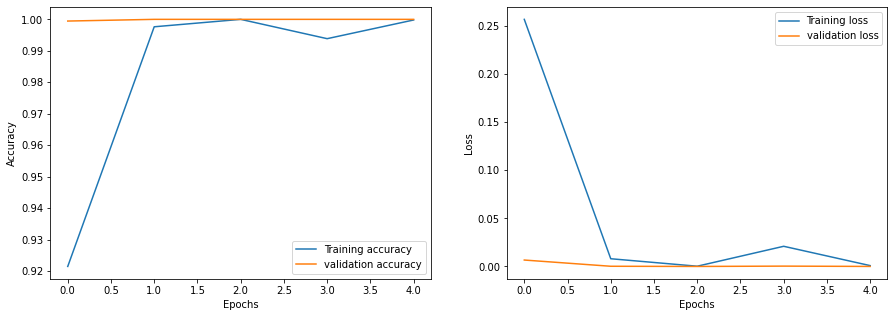

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(5),train_accu,label= 'Training accuracy')
plt.plot(range(5),val_accu,label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(5),train_loss,label= 'Training loss')
plt.plot(range(5),val_loss,label = 'validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

* It is observed that even from the second epoch the accuracy is nearly 1 and the loss dropped to 0

*Evaluating* the test data


* Using evaluate method to evaluate the test datset and checking predicted and the actual label using predict function

In [ ]:
model.evaluate(df_test)

58/58 [==============================] - 284s 4s/step - loss: 6.9228e-05 - accuracy: 1.0000


[6.92278117639944e-05, 1.0]

actual label Y
predicted_label Y


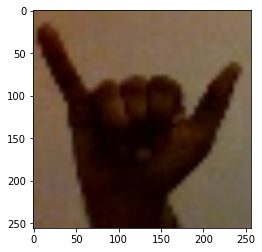

In [ ]:
for image, label in df_test.take(1):
  plt.imshow(image[1].numpy().astype('int'))
  print('actual label', classes[label[1]])

  prediction = model.predict(image)
  print('predicted_label',classes[np.argmax(prediction[1])] )



## Conclusion


1. Used image_dataset_from_directory to load the image data

2. Have used splitfolders, to split the data into train, validation and test dataset as imgae_dataset_from_directory only have an option to split data into train and test split

3. Used only training data to explore, preprocess and visualise the data 

4. During data preprocessing have used resizing, rescaling and randomzoom preprocessing layers

5. I have not used data augumentation in the processing step as augumentation steps like random rotation and random flipping will change the image itself and destroys its true meaning

6. During model building have used conv2D, maxpooling , and dense layers. I tried adding and reducing the cnn layers and found having 4 layers itself gives better accuracy and used only 2 dense laysers since cnn layers itself does the maximum job

7.  Also tried different optimizers and used adam optimizer since it gave better accuracy

8. Train the model providing training dataset and evaluated with the validation dataset

9. Evaluated the model by plotting the loss and accuracy score between the training data and validation data 

10. I have also not used dropout layer since the data doesnot seem to overfit which was clear from the accuracy score between training and validation data

11. Model was evaluated by providing the test data and the accuracy was 100 percent

12. Saved the tensorflow model using h5 model

13. If I had a better computational power, would even have tried different combinations of cnn layers, activation function, optimizers and different loss functions



References

1. Convolutional Neural Network (CNN (2019). Convolutional Neural Network (CNN)  |  TensorFlow Core. [online] TensorFlow. Available at: https://www.tensorflow.org/tutorials/images/cnn.


2. TensorFlow. (n.d.). tf.keras.utils.image_dataset_from_directory | TensorFlow Core v2.8.0. [online] Available at: https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory.


3. TensorFlow. (n.d.). Image classification | TensorFlow Core. [online] Available at: https://www.tensorflow.org/tutorials/images/classification.


4. www.washington.edu. (n.d.). What is sign language? | AccessComputing. [online] Available at: https://www.washington.edu/accesscomputing/what-sign-language#:~:text=The%20gestures%20or%20symbols%20in [Accessed 26 Jun. 2022].

5. Suki Lau (2017). Image Augmentation for Deep Learning. [online] Medium. Available at: https://towardsdatascience.com/image-augmentation-for-deep-learning-histogram-equalization-a71387f609b2.


6. jason brownlee (2019). Loss and Loss Functions for Training Deep Learning Neural Networks. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/.


7. Musstafa (2022). Optimizers in Deep Learning. [online] MLearning.ai. Available at: https://medium.com/mlearning-ai/optimizers-in-deep-learning-7bf81fed78a0.


8. TensorFlow. (n.d.). tf.keras.layers.RandomZoom | TensorFlow Core v2.9.1. [online] Available at: https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom [Accessed 26 Jun. 2022].
